In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO
import requests

In [2]:
# Load Dataset from URL because my file path has some permission error
url = "https://drive.google.com/uc?export=download&id=1UlWRYU0UglE2ex3iFse0J6eCLEU8g98P"
response = requests.get(url)
df = pd.read_csv(StringIO(response.text))


In [3]:
# Q1: Perform Basic EDA
print("Dataset Info:\n", df.info())
print("\nMissing Values:\n", df.isnull().sum())
print("\nSummary Statistics:\n", df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        13200 non-null  object 
 1   size            13200 non-null  object 
 2   total_sqft      13200 non-null  float64
 3   bath            13200 non-null  float64
 4   price           13200 non-null  float64
 5   bhk             13200 non-null  int64  
 6   price_per_sqft  13200 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 722.0+ KB
Dataset Info:
 None

Missing Values:
 location          0
size              0
total_sqft        0
bath              0
price             0
bhk               0
price_per_sqft    0
dtype: int64

Summary Statistics:
          total_sqft          bath         price           bhk  price_per_sqft
count  13200.000000  13200.000000  13200.000000  13200.000000    1.320000e+04
mean    1555.302783      2.691136    112.276178      2

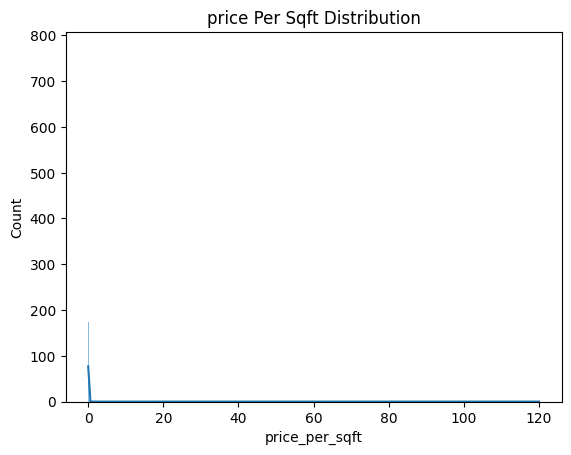

In [14]:
# Visualizing Price Per Sqft
df['price_per_sqft'] = df['price'] / df['total_sqft']  # Create price per sqft if not available
sns.histplot(df['price_per_sqft'], kde=True)
plt.title("price Per Sqft Distribution")
plt.show()

In [5]:
print(df.columns)

Index(['location', 'size', 'total_sqft', 'bath', 'price', 'bhk',
       'price_per_sqft'],
      dtype='object')


In [38]:
# Q2: Detect and Remove Outliers
def remove_outliers(df, column):
    methods = {}

    # Method 1: Mean & Standard Deviation
    mean = df[column].mean()
    std = df[column].std()
    df1 = df[(df[column] >= mean - 3 * std) & (df[column] <= mean + 3 * std)]
    methods['Mean-Std'] = df1.copy()
    
    # Method 2: Percentile Method
    lower, upper = np.percentile(df[column], [5, 95])
    df2 = df[(df[column] >= lower) & (df[column] <= upper)]
    methods['Percentile'] = df2.copy()
    
    # Method 3: IQR Method
    Q1, Q3 = np.percentile(df[column], [25, 75])
    IQR = Q3 - Q1
    lower_bound, upper_bound = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
    df3 = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    methods['IQR'] = df3.copy()
    
    # Method 4: Z-Score Method
    df['z_score'] = (df[column] - mean) / std
    df4 = df[df['z_score'].abs() <= 3].drop(columns=['z_score'])
    methods['Z-Score'] = df4.copy()
    
    return methods

outlier_removed_dfs = remove_outliers(df, 'price_per_sqft')


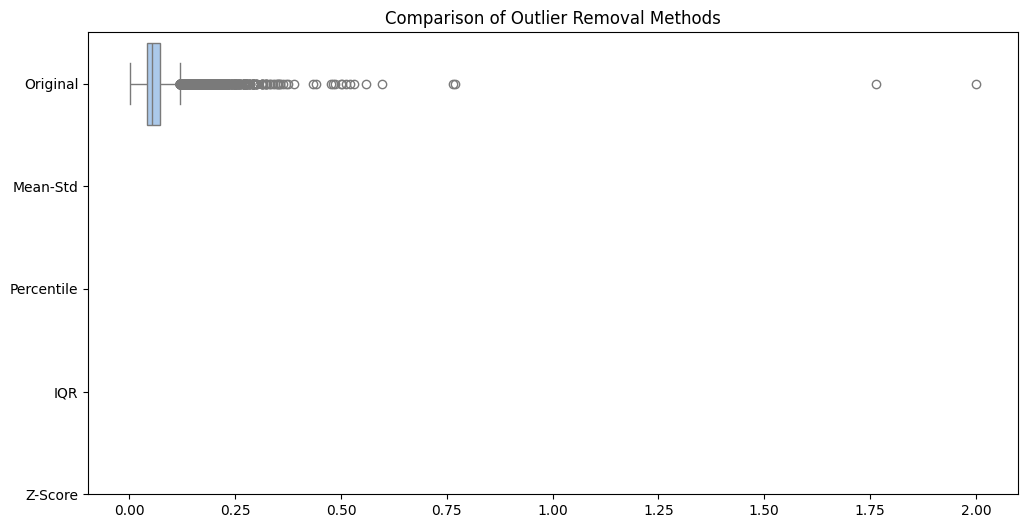

In [39]:
# Q3: Box Plots
plt.figure(figsize=(12, 6))
sns.boxplot(data=[df['price_per_sqft']] + [outlier_removed_dfs[m]['price_per_sqft'] for m in outlier_removed_dfs.keys()],
            orient='h',
            palette='pastel')
plt.yticks(range(5), ['Original'] + list(outlier_removed_dfs.keys()))
plt.title("Comparison of Outlier Removal Methods")
plt.show()


Skewness before transformation: 108.28105905387409
Kurtosis before transformation: 12095.21563479974


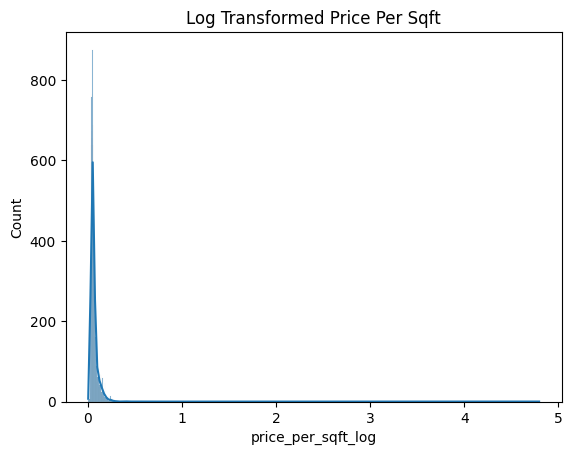

Skewness after transformation: 36.32341022801809
Kurtosis after transformation: 2094.6153660285063


In [40]:
# Q4: Normality Check and Transformation
print("Skewness before transformation:", df['price_per_sqft'].skew())
print("Kurtosis before transformation:", df['price_per_sqft'].kurtosis())

df['price_per_sqft_log'] = np.log1p(df['price_per_sqft'])

sns.histplot(df['price_per_sqft_log'], kde=True)
plt.title("Log Transformed Price Per Sqft")
plt.show()

print("Skewness after transformation:", df['price_per_sqft_log'].skew())
print("Kurtosis after transformation:", df['price_per_sqft_log'].kurtosis())


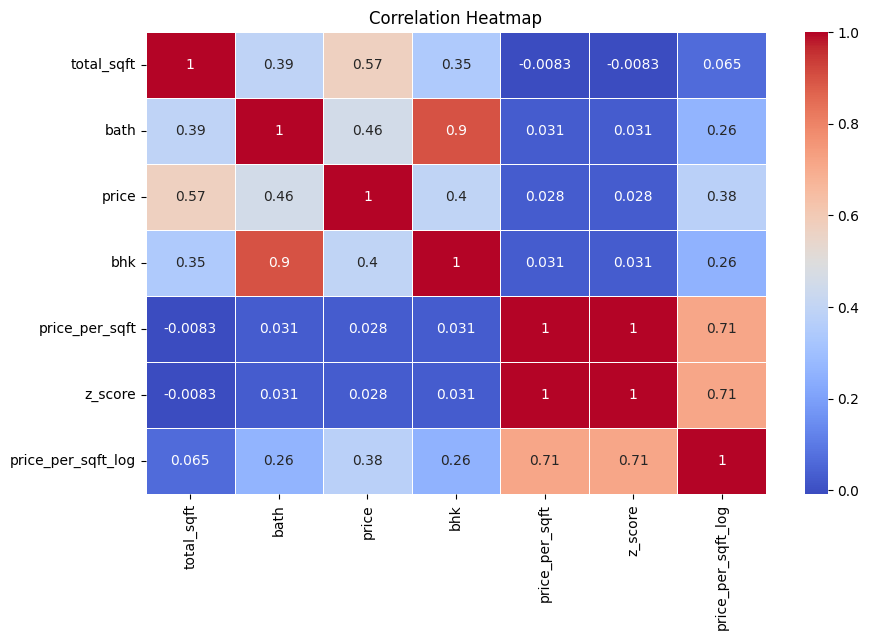

In [42]:
# Q5: Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.select_dtypes(include=[np.number]).corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
# Q6: Scatter Plots
sns.pairplot(df[['price_per_sqft', 'price', 'total_sqft']])
plt.show()
